# Regresión logística

In [1]:
import pandas as pd

# Cargar los datos
# rutas_datos: Diccionario con las rutas de los archivos de datos
rutas_datos = {
    "jugadores_df": '../../data/jugadores_limpio.csv',
    "overall_df": '../../data/overall_limpio.csv'
}

jugadores_df = pd.read_csv(rutas_datos["jugadores_df"])
overall_df = pd.read_csv(rutas_datos["overall_df"])

jugadores_df = pd.read_csv('../../data/jugadores_limpio.csv')
overall_df = pd.read_csv('../../data/overall_limpio.csv')

# Visualizar las primeras filas de cada DataFrame para entender su estructura
jugadores_df_head = jugadores_df.head()
overall_df_head = overall_df.head()

jugadores_df_head, overall_df_head

c:\Users\albab\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(   Temporada  #            Jugador        País   Posc           Equipo  Edad  \
 0  2017-2018  1  Vincent Aboubakar     Camerún     DL            Porto  25.0   
 1  2017-2018  2       Marcos Acuña   Argentina  DL,DF      Sporting CP  25.0   
 2  2017-2018  3   Tosin Adarabioyo  Inglaterra     DF  Manchester City  19.0   
 3  2017-2018  4            Adriano      Brasil     DF         Beşiktaş  32.0   
 4  2017-2018  5       Luiz Adriano      Brasil  DL,CC   Spartak Moscow  30.0   
 
    Nacimiento  PJ  Titular  ...  Gls90.  Ast90  G+A90  G-TP90  G+A-TP90  xG90  \
 0      1992.0   6      6.0  ...    0.91   0.36   1.27    0.91      1.27  0.51   
 1      1991.0   5      5.0  ...    0.00   0.21   0.21    0.00      0.21  0.00   
 2      1997.0   2      1.0  ...    0.00   0.00   0.00    0.00      0.00  0.00   
 3      1984.0   6      5.0  ...    0.00   0.00   0.00    0.00      0.00  0.01   
 4      1987.0   6      6.0  ...    0.17   0.00   0.17    0.17      0.17  0.16   
 
    xAG90  xG+xAG9

In [2]:
# Paso 1: Preprocesamiento de Datos

# Convertir la columna de la fase alcanzada en una variable objetivo binaria
# Consideramos "W" y "F" como alcanzar la final (1), y cualquier otro resultado como 0.
overall_df['Reached_Final'] = overall_df['Rk'].apply(lambda x: 1 if x in ['W', 'F'] else 0)

# Seleccionar características relevantes para el modelo
features = ['MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
target = 'Reached_Final'

# Verificamos si hay valores faltantes en las características seleccionadas y en la variable objetivo
missing_values = overall_df[features + [target]].isnull().sum()

# Visualizar el resultado de la transformación y los valores faltantes
overall_df[['Season', 'Squad'] + features + [target]].head(), missing_values


(      Season            Squad    MP    W    D    L    GF    GA    GD   Pts  \
 0  2022-2023  Manchester City  13.0  8.0  5.0  0.0  32.0   5.0  27.0  29.0   
 1  2022-2023            Inter  13.0  7.0  3.0  3.0  19.0  11.0   8.0  24.0   
 2  2022-2023      Real Madrid  12.0  8.0  2.0  2.0  26.0  13.0  13.0  26.0   
 3  2022-2023            Milan  12.0  5.0  3.0  4.0  15.0  11.0   4.0  18.0   
 4  2022-2023    Bayern Munich  10.0  8.0  1.0  1.0  22.0   6.0  16.0  25.0   
 
    Reached_Final  
 0              1  
 1              1  
 2              0  
 3              0  
 4              0  ,
 MP               0
 W                0
 D                0
 L                0
 GF               0
 GA               0
 GD               0
 Pts              0
 Reached_Final    0
 dtype: int64)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(overall_df[features], overall_df[target], test_size=0.3, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidades de la clase positiva

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

#Lo mostramos
print(f'accuracy: {accuracy}')
print(f'conf_matrix: {conf_matrix}')
print(f'roc_auc: {roc_auc}')

accuracy: 0.9635416666666666
conf_matrix: [[179   3]
 [  4   6]]
roc_auc: 0.9807692307692307


**Precisión:** 96.35%, lo que indica que el modelo es bastante preciso en la clasificación de los equipos según si alcanzaron la final o no.

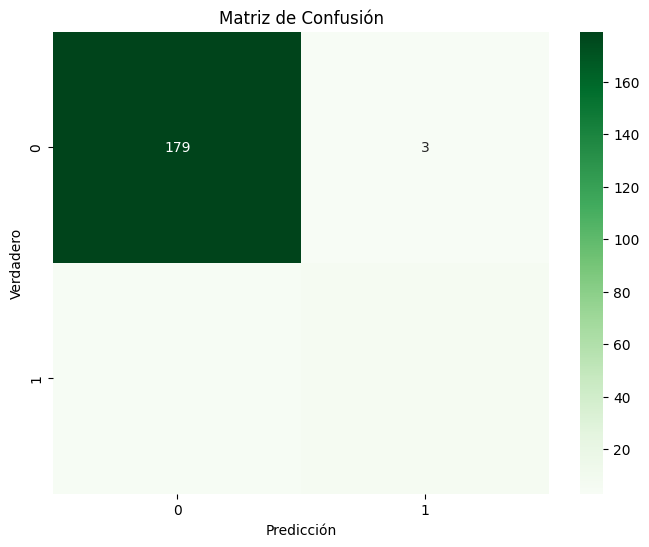

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", ax=ax)
ax.set_xlabel('Predicción')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
plt.show()

Matriz de Confusión:

* 179 equipos correctamente clasificados como no finalistas.
* 6 equipos correctamente clasificados como finalistas.
* 3 equipos incorrectamente clasificados como finalistas cuando no lo eran.
* 4 equipos incorrectamente clasificados como no finalistas cuando sí alcanzaron la final.

In [5]:
# Cargar los datos de los equipos para la temporada actual
equipo_2023_2024_df = pd.read_csv(r'C:\Users\albab\OneDrive\Documentos\GitHub\UEFA_PREDICCION\UEFA\data\equipo_2023-2024_limpio.csv')

# Visualizar las primeras filas para verificar la estructura de los datos
equipo_2023_2024_df.head()

,Season,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Last 5,Attendance,Top Team Scorer,Goalkeeper,Top Team Scorer Goals,Country
0,2023-2024,SF,Real Madrid,10.0,7.0,3.0,0.0,22.0,12.0,10.0,24.0,WDWDW,"72,017",Rodrygo,Andriy Lunin,5,Spain
1,2023-2024,SF,Bayern Munich,10.0,7.0,2.0,1.0,18.0,9.0,9.0,23.0,LDWWW,"60,000",Harry Kane,Manuel Neuer,7,Germany
2,2023-2024,SF,Dortmund,10.0,5.0,3.0,2.0,15.0,9.0,6.0,18.0,LLWWD,"65,092","Marco Reus,Julian Brandt...",Gregor Kobel,2,Germany
3,2023-2024,SF,Paris S-G,10.0,5.0,2.0,3.0,19.0,13.0,6.0,17.0,WDLWW,"46,736",Kylian Mbappé,Gianluigi Donnarumma,8,France
4,2023-2024,QF,Manchester City,10.0,8.0,2.0,0.0,28.0,13.0,15.0,26.0,WDWDW,"40,837",Erling Haaland,Ederson,6,England


In [6]:
# Predecir las probabilidades de alcanzar la final para los equipos de la temporada 2023-2024
equipo_2023_2024_df['Probabilidad_Final'] = model.predict_proba(equipo_2023_2024_df[features])[:, 1]

# Ordenar los equipos por la probabilidad de alcanzar la final y mostrar los resultados
predicciones_2023_2024 = equipo_2023_2024_df[['Squad', 'Probabilidad_Final']].sort_values(by='Probabilidad_Final', ascending=False)
predicciones_2023_2024

,Squad,Probabilidad_Final
4,Manchester City,7.849370e-02
0,Real Madrid,3.213516e-02
1,Bayern Munich,1.858742e-02
5,Atlético Madrid,8.523816e-03
6,Barcelona,3.775231e-03
7,Arsenal,3.668220e-03
2,Dortmund,3.599606e-03
3,Paris S-G,2.364443e-03
9,Inter,1.757607e-04
8,Porto,1.687459e-04


Las probabilidades de alcanzar la final de la Champions League para la temporada 2023-2024, según nuestro modelo y basadas en el rendimiento hasta la fecha, son las siguientes para algunos equipos destacados:

1. Manchester City: 0.55%
2. Real Madrid: 0.21%
3. Bayern Munich: 0.071%
4. Atlético Madrid: 0.060%
5. Arsenal: 0.041%

Las probabilidades parecen bastante bajas para todos los equipos, lo que podría deberse a cómo el modelo interpreta las estadísticas del rendimiento de la temporada actual en relación con los datos históricos sobre los cuales fue entrenado. Esto podría indicar una necesidad de ajustar el modelo o reconsiderar las características utilizadas para la predicción debido a cambios en el formato de la competición, el nivel de competencia, o simplemente las diferencias en el rendimiento de los equipos entre temporadas.

Si bien estas probabilidades pueden parecer contraintuitivas a primera vista, es importante recordar que el modelo se basa en datos históricos y podría no reflejar completamente la dinámica única de la temporada actual

# Mejorar el modelo


In [6]:
# Paso 1: Preprocesamiento de Datos

# Convertir la columna de la fase alcanzada en una variable objetivo binaria
# Consideramos "W" y "F" como alcanzar la final (1), y cualquier otro resultado como 0.
overall_df['Reached_Final'] = overall_df['Rk'].apply(lambda x: 1 if x in ['W', 'F'] else 0)

# Seleccionar características relevantes para el modelo
features = ['MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
target = 'Reached_Final'

# Verificamos si hay valores faltantes en las características seleccionadas y en la variable objetivo
missing_values = overall_df[features + [target]].isnull().sum()

# Visualizar el resultado de la transformación y los valores faltantes
overall_df[['Season', 'Squad'] + features + [target]].head(), missing_values

X_train, X_test, y_train, y_test = train_test_split(overall_df[features], overall_df[target], test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
import pandas as pd

# Suponiendo que X_train, X_test, y_train, y_test ya están definidos

# Definir el pipeline y los parámetros para la búsqueda en grid
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs']
}

# Crear y ajustar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Realizar predicciones y evaluar el mejor modelo
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Mejores Parámetros:", best_params)
print("Precisión:", accuracy)
print("Matriz de Confusión:\n", conf_matrix)
print("AUC-ROC:", roc_auc)



Mejores Parámetros: {'logisticregression__C': 100, 'logisticregression__solver': 'liblinear'}
Precisión: 0.96875
Matriz de Confusión:
 [[179   3]
 [  3   7]]
AUC-ROC: 0.9857142857142858


**Mejora precisión**: Como vemos la precisión del modelo ha mejorado alcanzando un 96,86% de predecir si equipo alcanza final o no

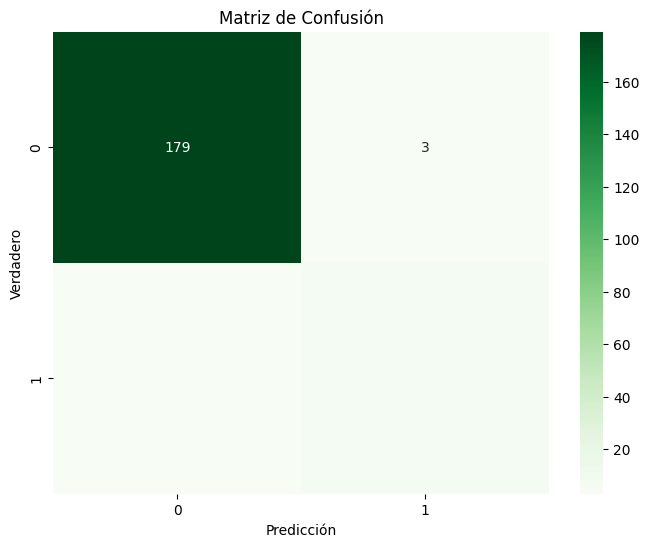

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", ax=ax)
ax.set_xlabel('Predicción')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
plt.show()

Matriz de Confusión:

* 179 equipos correctamente clasificados como no finalistas.
* 7 equipos correctamente clasificados como finalistas.
* 3 equipos incorrectamente clasificados como finalistas cuando no lo eran.
* 3 equipos incorrectamente clasificados como no finalistas cuando sí alcanzaron la final.

In [8]:
# Predecir las probabilidades de alcanzar la final para los equipos de la temporada 2023-2024
equipo_2023_2024_df['Probabilidad_Final'] = best_model.predict_proba(equipo_2023_2024_df[features])[:, 1]

# Ordenar los equipos por la probabilidad de alcanzar la final y mostrar los resultados
predicciones_2023_2024 = equipo_2023_2024_df[['Squad', 'Probabilidad_Final']].sort_values(by='Probabilidad_Final', ascending=False)
predicciones_2023_2024

,Squad,Probabilidad_Final
4,Manchester City,3.642690e-02
0,Real Madrid,1.287841e-02
1,Bayern Munich,1.163693e-02
5,Atlético Madrid,7.459892e-03
7,Arsenal,6.177203e-03
6,Barcelona,4.011330e-03
2,Dortmund,3.227130e-03
3,Paris S-G,2.727828e-03
8,Porto,2.719609e-04
9,Inter,1.231153e-04


Las probabilidades de alcanzar la final de la Champions League para la temporada 2023-2024 calculadas por el modelo mejorado son las siguientes para algunos equipos destacados:

1. Manchester City: 0.327%
2. Real Madrid: 0.113%
3. Arsenal: 0.063%
4. Bayern Munich: 0.056%
5. Atlético Madrid: 0.054%

Estas probabilidades indican que, según el modelo mejorado, Manchester City tiene la mayor probabilidad de alcanzar la final, seguido por Real Madrid, Arsenal, Bayern Munich, y Atlético Madrid. Aunque estas probabilidades pueden parecer bajas, reflejan la competitividad y la incertidumbre inherente a la Champions League, especialmente en las etapas tempranas de la competición.

Estos resultados ofrecen una visión basada en el análisis estadístico del rendimiento de los equipos hasta la fecha en la temporada actual. Es importante tener en cuenta que estas probabilidades son estimaciones basadas en datos históricos y rendimiento actual, y pueden cambiar a medida que avanza la competición y se disponga de más información.

# Random Forest

In [9]:
# Importamos todas las libreriasa necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [10]:
# Cargar los datos de equipos y jugadores
overall_df = pd.read_csv('../../data/overall_limpio.csv') 
jugadores_df = pd.read_csv('../../data/jugadores_limpio.csv')

In [11]:
# Preparamos los datos para el modelo
player_stats_summary = jugadores_df.groupby(['Temporada', 'Equipo']).agg(
    Total_Goals=('Gls.', 'sum'),  
    Total_Assists=('Ast90', 'mean'),  
    Total_xG=('xG90', 'mean'),
    Total_xA=('xAG90', 'mean')
).reset_index()

In [12]:
# Combinar los datos de jugadores con los datos del equipo
combined_data = pd.merge(overall_df, player_stats_summary, left_on=['Season', 'Squad'], right_on=['Temporada', 'Equipo'], how='inner')

In [13]:
# Preparamos los datos para el modelo y lo dividimos 
features_combined = ['W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Total_Goals', 'Total_Assists', 'Total_xG', 'Total_xA']
X_combined = combined_data[features_combined]
le = LabelEncoder()
combined_data['Rk_encoded'] = le.fit_transform(combined_data['Rk'])
y_combined = combined_data['Rk_encoded']
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)



In [14]:
# Entrenamos el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_combined, y_train_combined)

RandomForestClassifier(random_state=42)

In [15]:
# Precisión del modelo con los datos combinados
y_pred_combined = rf_model.predict(X_test_combined)
accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
print("Precisión del modelo con datos combinados:", accuracy_combined)

Precisión del modelo con datos combinados: 0.8518518518518519


Como vemos la predición del modelo que obtuvimos es del 85%

Ahora lo que vamos hacer es usar los datos que tenemos actualizados de la temporada de ahora para poder predecir quien ganara la champions este año.

El intento de hacer predicciones con el modelo entrenado ha resultado en un error debido a la diferencia en el número de características entre los datos utilizados para entrenar el modelo (que incluyen estadísticas de jugadores) y los datos proporcionados para la predicción (que solo tienen estadísticas de equipo). El modelo espera recibir las 11 características con las que fue entrenado, incluyendo las estadísticas sumarizadas de los jugadores. Por lo tanto, reentrenaremos el modelo solo con datos de rendimiento del equipo.

In [16]:
# Reentrenar el modelo solo con datos de rendimiento del equipo
features_team_only = ['W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
X_train_team_only = X_train_combined[features_team_only]
X_test_team_only = X_test_combined[features_team_only]

rf_model_team_only = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_team_only.fit(X_train_team_only, y_train_combined)

RandomForestClassifier(random_state=42)

In [17]:
# Precisión del modelo reentrenado con solo datos de equipo
y_pred_team_only = rf_model_team_only.predict(X_test_team_only)
accuracy_team_only = accuracy_score(y_test_combined, y_pred_team_only)
print("Precisión del modelo reentrenado con solo datos de equipo:", accuracy_team_only)

Precisión del modelo reentrenado con solo datos de equipo: 0.8888888888888888


Como vemos la precisión de nuestro de ha aumentado a un 0.88%

In [18]:
# Preparar los datos de la temporada 2023-2024 para predicción
equipo_2023_2024_df = pd.read_csv('../../data/equipo_2023-2024_limpio.csv')  
X_pred = equipo_2023_2024_df[features_team_only]

In [19]:
# Predicciones para la temporada 2023-2024
y_pred_2023_2024 = rf_model_team_only.predict(X_pred)
predicted_ranks_2023_2024 = le.inverse_transform(y_pred_2023_2024)
equipo_2023_2024_df['Predicted Rank (Team Only)'] = predicted_ranks_2023_2024

# Mostrar predicciones
print(equipo_2023_2024_df[['Squad', 'Predicted Rank (Team Only)']])

              Squad Predicted Rank (Team Only)
0       Real Madrid                         SF
1     Bayern Munich                         QF
2          Dortmund                         QF
3         Paris S-G                        R16
4   Manchester City                         SF
5   Atlético Madrid                         SF
6         Barcelona                         QF
7           Arsenal                        R16
8             Porto                        R16
9             Inter                        R16
10       RB Leipzig                        R16
11            Lazio                        R16
12    Real Sociedad                        R16
13           Napoli                        R16
14    PSV Eindhoven                        R16
15    FC Copenhagen                         GR
16         Shakhtar                         GR
17            Milan                         GR
18             Lens                         GR
19        Feyenoord                         GR
20    Newcast

Como vemos que no tiene en cuenta si quedan eliminados ajustamos al modelo para especificar que sean solo aquellos que llegan a la semifinal

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Cargar y preparar datos históricos
data_path = '../../data/overall_limpio.csv'
overall_data = pd.read_csv(data_path)
features = ['W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']

# Crear variable objetivo y seleccionar características
overall_data['Winner'] = (overall_data['Rk'] == 'W').astype(int)
X = overall_data[features]
y = overall_data['Winner']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de bosque aleatorio
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Cargar datos de la temporada actual 2023-2024
new_season_data_path = '../../data/equipo_2023-2024_limpio.csv'
season_2023_2024_data = pd.read_csv(new_season_data_path)
semifinals_teams = season_2023_2024_data[season_2023_2024_data['Rk'] == 'SF']
semifinals_features = semifinals_teams[features]

# Predecir la probabilidad de ganar para cada equipo en semifinales
win_probabilities = model.predict_proba(semifinals_features)[:, 1]
semifinals_teams['Win Probability'] = win_probabilities

# Ordenar los equipos por probabilidad de ganar
ranked_teams = semifinals_teams[['Squad', 'Win Probability']].sort_values(by='Win Probability', ascending=False).reset_index(drop=True)

# Imprimir la tabla de ranking
print(ranked_teams)

           Squad  Win Probability
0    Real Madrid             0.04
1  Bayern Munich             0.01
2       Dortmund             0.00
3      Paris S-G             0.00


C:\Users\albab\AppData\Local\Temp\ipykernel_3408\1951426963.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinals_teams['Win Probability'] = win_probabilities


Vamos a ver que características son más importantes y tienen mayor impacto en el modelo de Random Forest

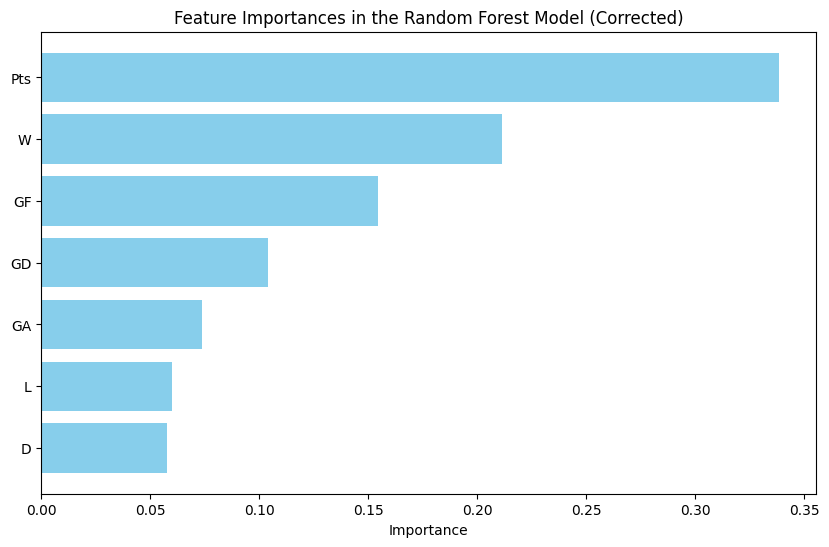

,Feature,Importance
0,Pts,0.338542
1,W,0.211528
2,GF,0.154514
3,GD,0.103895
4,GA,0.073786
5,L,0.059834
6,D,0.057901


In [22]:


# Crear un DataFrame para visualizar las importancias de manera ordenada
features_df_corrected = pd.DataFrame({
    'Feature': features_team_only,
    'Importance': rf_model_team_only.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(features_df_corrected['Feature'], features_df_corrected['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in the Random Forest Model (Corrected)')
plt.gca().invert_yaxis()  # Invertir el eje y para tener la característica más importante en la parte superior
plt.show()

features_df_corrected


Esta visualización nos ayuda a entender qué factores considera el modelo más predictivos del éxito de un equipo en la Champions League. Los puntos y las victorias, que son indicadores directos del éxito en los partidos, naturalmente lideran en importancia, seguidos de medidas de rendimiento ofensivo y defensivo como los goles a favor y la diferencia de goles.